# 🍓 분류 (Classification)

## 🍋 1. kNN 모델
> k-Nearest Neighbor = 최근접 이웃 알고리즘 
새로운 데이터가 어느 그룹에 속하는지 분류하기 위해  
그 데이터에 __가장 가까이에 있는__ 학습 데이터가 속한 그룹을 알아보는 것


새로운 데이터를 중심으로 가상의 원을 확장해 가다가 첫 번째 데이터가 발견되면 그 데이터가 속해있는 그룹으로 분류한다.  
미리 학습을 하지 않고 새로운 데이터가 주어지면 그때 일반화를 수행한다.

<img src="https://blog.kakaocdn.net/dn/bIPgPh/btqyUfXFHSg/zaSUkU4xoqEEAsOClKWvw1/img.png" width="700" height="400">  

__kNN에서 k는 새로운 데이터가 속한 그룹을 알아내기 위해 인접 데이터를 k개 만큼 찾겠다는 뜻이다.__


* k가 너무 작으면 노이즈~~(잘못 입력됐거나 평균값과 큰 차이가 있는 데이터)~~까지 신경쓸만큼 민감하게 반응함  
* k가 너무 크면 분류 경계가 둔감하여 변별력 떨어짐  



<br/>

---

## 🍋 2. 서포트 벡터 머신(SVM)
> support vector machine  
데이터가 __2개의 그룹으로 분류될 때__ 사용함  
학습 데이터가 벡터 공간에 위치한다고 생각하고, 학습 데이터가 속한 2개의 그룹을 분류하는 선형 분리자를 찾는 모델  



In [1]:
#데이터, 모듈 불러오기 및 KNN 피팅
from sklearn import neighbors, datasets


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# 모델 구축

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

y_pred=clf.predict(X)

from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

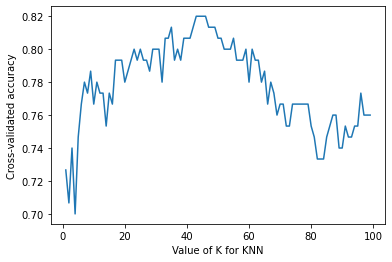

In [2]:
#cross-validation을 이용해 k 찾기
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

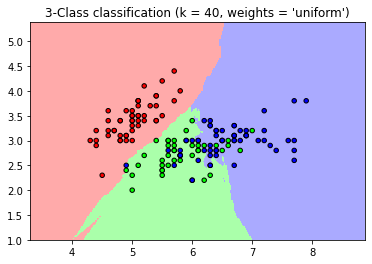

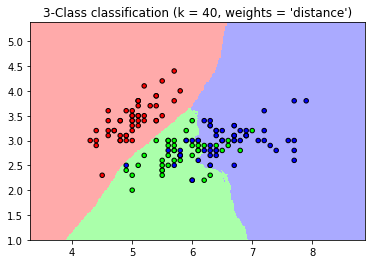

In [3]:
#Weight를 준 kNN
#K의 Value를 40으로 설정함

n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

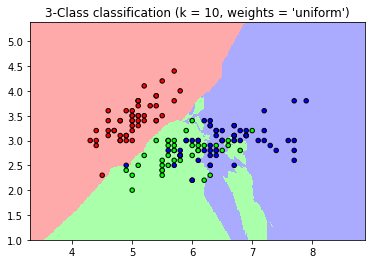

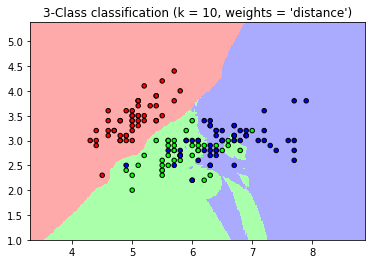

In [4]:
#K의 Value를 10으로 설정함

n_neighbors = 10

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()



<br/>

---

## 🍋 3. 의사결정 트리
>decision Tree  
각 데이터들이 가진 속성들로부터 패턴을 찾아내서 분류 과제를 수행함  
어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델  
결과물이 시각적으로 읽히기 쉬운 형태임  

<img src="https://i.imgur.com/EBKl1I3.png" width="300" height="300">


### 프로세스

데이터를 가장 잘 구분할 수 있는 질문을 기준으로 나눈다.
* 깊이 1

<img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-24.png?w=768" width="500" height="500">

* 깊이 2
<img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-25.png?w=768" width="500" height="500">

* 깊이 9
    * 기준이 너무 많아지면 오버피팅이 됨
    * 예측 성능인 일반화(generalization) 능력이 떨어질 수 있으므로 terminal node를 적절하게 합쳐주어야 함
 
<img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-26.png?w=768" width="500" height="500">


>terminal node를 적절하게 합친 예시  
<img src="https://i.imgur.com/5zhZIAw.png" width ="600" height="400">  

---

출처 정리

https://bskyvision.com/563

https://velog.io/@guns/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-3%EC%9D%BC%EC%B0%A8-K-NN-K-Nearest-Neighbor

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

https://imgur.com/5zhZIAw